<a href="https://colab.research.google.com/github/EAkeweje/GEOMETRIC-LEARNING-FOR-FLOWS-IN-POROUS-SYSTEMS/blob/main/Extraction%20of%20Pore%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install porespy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
import networkx as nx
ps.visualization.set_mpl_style()
np.random.seed(10)

In [ ]:
%cd /content/drive/MyDrive/Skoltech/Research/GDL

/content/drive/MyDrive/Skoltech/Research/GDL


In [ ]:
#####custom functions########
import os
import sys
sys.path.append(os.getcwd()+'/scripts')

import utils
from NWR import *

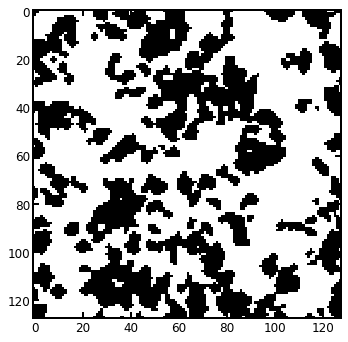

In [ ]:
img_array = utils.gen_pore_array("./Dataset/Fluid Flow Simulation/1.png") #import pore image
kernel_size = 2
im = utils.coarse_grain(np.rot90(img_array),kernel_size) #coarse-grain pore
#There is a need to adjust the array and convert to boolen data type because thats what porespy and openpnm wants
#True implies there is pore space while false implies no pore space
im = np.where(im < kernel_size**2/2, True, False)
# print(im)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im, cmap ='gray');

In [ ]:
snow_output = ps.networks.snow2(im, voxel_size=1.0, boundary_width=0,r_max=1, sigma=0.1)

2022-09-03 22:58:48 | INFO     | porespy.filters._snows:trim_saddle_points:378
--> Found 28 saddle points
2022-09-03 22:58:48 | INFO     | porespy.filters._snows:trim_saddle_points:378
--> Found 46 saddle points
2022-09-03 22:58:48 | INFO     | porespy.filters._snows:trim_saddle_points:378
--> Found 35 saddle points
2022-09-03 22:58:48 | INFO     | porespy.filters._snows:trim_saddle_points:378
--> Found 31 saddle points


In [ ]:
snow_output.network.keys()

dict_keys(['throat.conns', 'pore.coords', 'pore.all', 'throat.all', 'pore.region_label', 'pore.phase', 'throat.phases', 'pore.region_volume', 'pore.equivalent_diameter', 'pore.local_peak', 'pore.global_peak', 'pore.geometric_centroid', 'throat.global_peak', 'pore.inscribed_diameter', 'pore.extended_diameter', 'throat.inscribed_diameter', 'throat.total_length', 'throat.direct_length', 'throat.perimeter', 'pore.volume', 'pore.surface_area', 'throat.cross_sectional_area', 'throat.equivalent_diameter'])

In [ ]:
try:
    proj = op.io.PoreSpy.import_data(snow_output.network)
except AttributeError:
    proj = op.io.from_porespy(snow_output.network)

In [ ]:
print(proj)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
 Object Name     Object ID                                                        
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
 net_01          <openpnm.network.GenericNetwork object at 0x7fb901f55230>        
 geo_01          <openpnm.geometry.Imported object at 0x7fb9017236b0>             
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [ ]:
pn = proj['net_01']
geo = proj['geo_01']

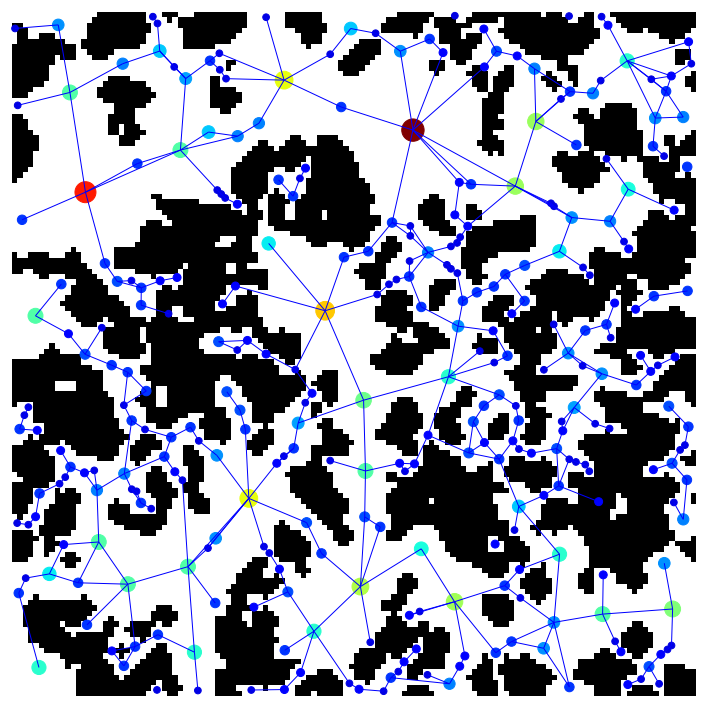

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])
ax.imshow(im.T, cmap=plt.cm.bone);
op.topotools.plot_coordinates(ax=ax,
                              network=pn,
                              size_by=pn["pore.inscribed_diameter"],
                              color_by=pn["pore.inscribed_diameter"],
                              markersize=500)
op.topotools.plot_connections(network=pn, ax=ax)
ax.axis("off");

In [ ]:
pn

In [ ]:
pn_networkx = op.io.NetworkX.export_data(pn)

In [ ]:
pn_networkx.nodes(data='geometric_centroid')

NodeDataView({0: [4.478260869565218, 4.773913043478261], 1: [0.7, 18.7], 2: [0.4, 31.8], 3: [4.588235294117647, 37.35294117647059], 4: [0.8666666666666667, 49.4], 5: [3.8296296296296295, 70.60740740740741], 6: [1.32, 88.58], 7: [0.5, 110.0], 8: [0.0, 124.4], 9: [2.0, 21.5], 10: [1.75, 52.0], 11: [8.09375, 125.0625], 12: [2.5, 31.5], 13: [3.8461538461538463, 33.0], 14: [2.5, 53.5], 15: [13.186858316221766, 93.74537987679672], 16: [10.278481012658228, 112.41772151898734], 17: [6.430769230769231, 22.29230769230769], 18: [4.166666666666666, 49.166666666666664], 19: [8.538461538461538, 45.38461538461539], 20: [8.333333333333334, 39.166666666666664], 21: [8.666666666666666, 76.53333333333333], 22: [9.11111111111111, 27.77777777777778], 23: [9.4, 40.4], 24: [10.375, 42.3125], 25: [13.11111111111111, 63.4], 26: [13.470588235294118, 12.764705882352942], 27: [10.0, 67.25], 28: [11.8125, 20.625], 29: [15.673267326732674, 28.26732673267327], 30: [15.333333333333332, 37.96969696969697], 31: [13.0, 

In [ ]:
pn_networkx.edges(data=False)#'geometric_centroid')

EdgeView([(0, 1), (1, 9), (2, 12), (3, 13), (3, 20), (4, 10), (4, 18), (5, 21), (5, 27), (6, 15), (7, 16), (8, 11), (9, 17), (10, 14), (11, 16), (12, 13), (15, 16), (15, 35), (15, 51), (15, 55), (16, 41), (17, 22), (17, 28), (19, 24), (20, 23), (22, 29), (23, 24), (24, 31), (25, 27), (25, 34), (25, 38), (26, 32), (28, 29), (28, 32), (29, 30), (29, 32), (30, 31), (30, 33), (30, 40), (31, 33), (32, 43), (32, 66), (35, 39), (36, 42), (36, 43), (37, 38), (37, 45), (37, 47), (39, 49), (39, 50), (40, 44), (40, 46), (40, 60), (41, 56), (42, 43), (43, 58), (44, 45), (44, 54), (45, 47), (46, 52), (46, 53), (48, 49), (48, 61), (49, 50), (49, 63), (51, 55), (52, 53), (52, 59), (54, 67), (55, 64), (55, 75), (55, 84), (55, 97), (56, 64), (56, 65), (56, 71), (58, 69), (60, 67), (60, 68), (62, 65), (63, 70), (64, 71), (64, 83), (66, 69), (66, 73), (66, 76), (66, 78), (66, 80), (67, 74), (68, 73), (69, 72), (74, 77), (75, 97), (76, 79), (76, 80), (77, 81), (79, 80), (80, 81), (80, 98), (80, 107), (80,

In [ ]:
#round up sensor locations
node_pos = {}
for key in dict(pn_networkx.nodes(data= 'geometric_centroid')).keys():
  val = dict(pn_networkx.nodes(data= 'geometric_centroid'))[key]
  node_pos[key] = (round(val[0]), round(val[1]))

In [ ]:
#make graph with only one attribute
pn_networkx_copy = nx.Graph()
pn_networkx_copy.add_nodes_from(pn_networkx.nodes(data= False))
pn_networkx_copy.add_edges_from(pn_networkx.edges(data=False))
nx.set_node_attributes(pn_networkx_copy, node_pos, 'node_pos' )

In [ ]:
pn_networkx_copy.nodes(data=True)

NodeDataView({0: {'node_pos': (4, 5)}, 1: {'node_pos': (1, 19)}, 2: {'node_pos': (0, 32)}, 3: {'node_pos': (5, 37)}, 4: {'node_pos': (1, 49)}, 5: {'node_pos': (4, 71)}, 6: {'node_pos': (1, 89)}, 7: {'node_pos': (0, 110)}, 8: {'node_pos': (0, 124)}, 9: {'node_pos': (2, 22)}, 10: {'node_pos': (2, 52)}, 11: {'node_pos': (8, 125)}, 12: {'node_pos': (2, 32)}, 13: {'node_pos': (4, 33)}, 14: {'node_pos': (2, 54)}, 15: {'node_pos': (13, 94)}, 16: {'node_pos': (10, 112)}, 17: {'node_pos': (6, 22)}, 18: {'node_pos': (4, 49)}, 19: {'node_pos': (9, 45)}, 20: {'node_pos': (8, 39)}, 21: {'node_pos': (9, 77)}, 22: {'node_pos': (9, 28)}, 23: {'node_pos': (9, 40)}, 24: {'node_pos': (10, 42)}, 25: {'node_pos': (13, 63)}, 26: {'node_pos': (13, 13)}, 27: {'node_pos': (10, 67)}, 28: {'node_pos': (12, 21)}, 29: {'node_pos': (16, 28)}, 30: {'node_pos': (15, 38)}, 31: {'node_pos': (13, 41)}, 32: {'node_pos': (21, 20)}, 33: {'node_pos': (15, 42)}, 34: {'node_pos': (16, 68)}, 35: {'node_pos': (17, 80)}, 36: {'n

In [ ]:
for i in range(10):
  print(pn_networkx.nodes(data= 'geometric_centroid')[i])

[4.478260869565218, 4.773913043478261]
[0.7, 18.7]
[0.4, 31.8]
[4.588235294117647, 37.35294117647059]
[0.8666666666666667, 49.4]
[3.8296296296296295, 70.60740740740741]
[1.32, 88.58]
[0.5, 110.0]
[0.0, 124.4]
[2.0, 21.5]


In [ ]:
def get_node_pos(G, node_list= None):
  '''
  inputs:::
  G: nx Graph
  node_list (list): A list of nodes to place gauges

  return:::
  A list of node position in the porous structure
  '''
  pos = []
  if not node_list:
    node_list = list(G.nodes)
  for i in node_list:
    pos.append(G.nodes(data = 'node_pos')[i])
  return pos

In [ ]:
#visuals: ploting pixel-graph on porous medium
def porenet_image(A,G, s=15, flip = True, rotate = False):
  '''
  inputs: takes three imputs
  - A: The pore array,
  - kernel_size: size of kernel for coarse graining operation, and
  - s: The figure size... default set to 15
  outputs: visualization of pore network on image
  '''
  n, e, c = G.number_of_nodes(), G.number_of_edges(), len(list(nx.connected_components(G)))
  print(f'{n} nodes, {e} edges, and {c} clusters')
  #visualization
  fig = plt.figure(figsize=(s,s))
  plt.imshow(A, cmap='Greys')
  nx.draw(G,pos = get_node_pos(G), node_size = 60)
  # ax.axis("off");
  plt.show()

311 nodes, 368 edges, and 10 clusters


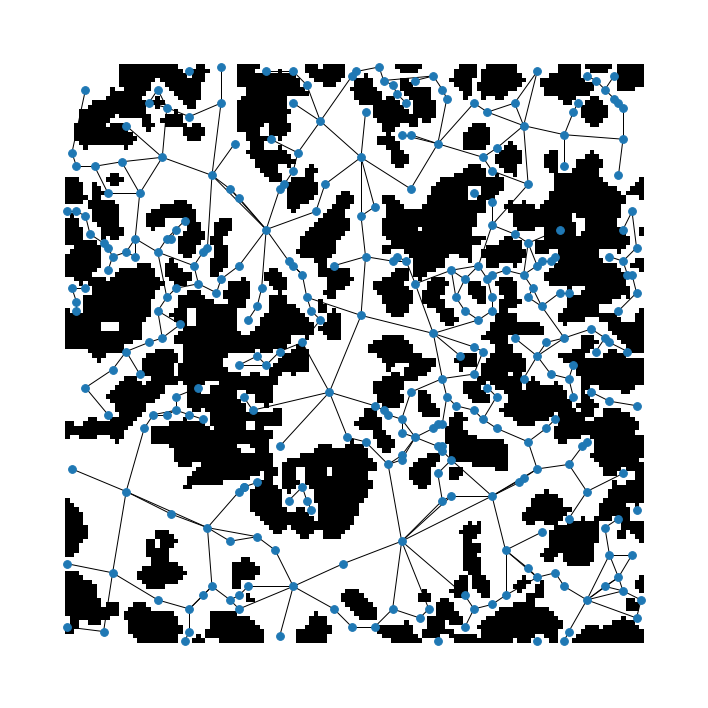

In [ ]:
porenet_image((1-im.T), pn_networkx_copy, s = 10)

In [ ]:
nodes = max(nx.connected_components(pn_networkx_copy), key=len)
H = nx.subgraph(pn_networkx_copy, nodes)

In [ ]:
#Reset nodes
mapping = {}
for i, j in enumerate(list(H.nodes)):
  mapping[j] = i

H = nx.relabel_nodes(H, mapping)
H.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

286 nodes, 352 edges, and 1 clusters


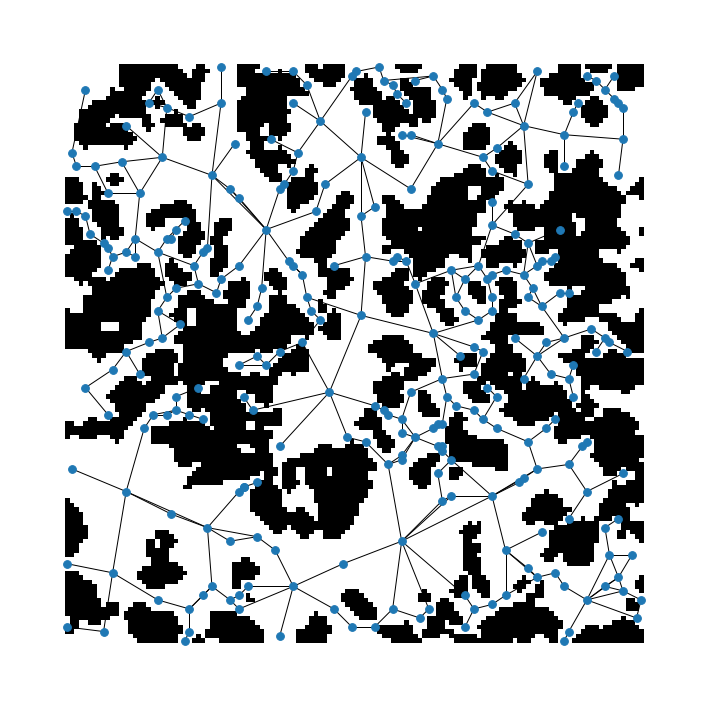

In [ ]:
porenet_image((1-im.T), H, s = 10)

In [ ]:
nx.write_gpickle(H, f"pore_network_0{kernel_size}.gpickle")

In [ ]:
G = nx.read_gpickle(f"pore_network_0{kernel_size}.gpickle")

In [ ]:
nodes = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
get_node_pos(G,nodes)

[(4, 5),
 (1, 19),
 (0, 32),
 (5, 37),
 (4, 71),
 (1, 89),
 (0, 110),
 (0, 124),
 (2, 22),
 (8, 125)]